In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
def read_data(Xpath="../data/q3/logisticX.csv",Ypath="../data/q3/logisticY.csv"):
    X = np.array(pd.read_csv(Xpath,header=None).values)
    Y = np.array(pd.read_csv(Ypath,header=None).values)
    X = normalize(X)
    return X,Y

def normalize(X):
    mean=np.mean(X,axis=0)
    X=(X-mean)/np.std(X,axis=0)
    return X

def augment_intecept(X):
    m=len(X)
    return np.c_[np.ones(m),X]

def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]


In [4]:
def h_theta(X,theta):
    Z = np.dot(X,theta)
    H = 1/(1+np.exp(-Z))
    return H
def grad_l_theta(X,Y,theta):
    H = h_theta(X,theta)
    grad=np.dot(X.T,(Y-H))
    return grad

# logistic regression
def logistic_regression(X,Y,alpha=0.1,threshold=0.00000001,max_iter=10000):
    theta=np.zeros((X.shape[1],1))
    converged=False
    costvector=[-1]
    iter=0
    while not converged:
        theta = theta + alpha*grad_l_theta(X,Y,theta)
        costvector.append(get_cost(X,Y,theta))
        if abs(costvector[-1]-costvector[-2])<threshold or iter>max_iter:
            converged=True
    return theta,costvector[1:]

# hessian calculation

def hessian(x,Y,theta):
    h=h_theta(x,theta)
    D=np.diag((h*(1-h)).flatten())
    # print(D)
    l_d=-np.dot(x.T,(Y-h))/(2*Y.shape[0])
    # print(l_d)
    print("F")
    # print(x)
    # print(np.dot(x.T,D)[-2])
    print(np.dot(np.dot(x.T,D),x))
    
    l_d_d=np.dot(np.dot(x.T,D),x)/(2*Y.shape[0])
    print(l_d_d)

    return l_d,l_d_d

# netwons method
def netwons_method(X,Y,maxiter=10,threshold=0.001):
    theta=np.zeros((X.shape[1],1))
    l_d,l_d_d=hessian(X,Y,theta)
    converged=False
    costvector=[-1]
    iter=0
    while not converged:
        iter+=1
        theta = theta - np.dot(np.linalg.pinv(l_d_d),l_d)
        cost=get_cost(X,Y,theta)
        costvector.append(cost)
        if(cost<threshold or abs(costvector[-1]-costvector[-2])<threshold or iter>maxiter):
            converged=True
    return theta,costvector[1:]

def get_accuracy(X,Y,theta):
    Y_pred=h_theta(X,theta)
    Y_pred=np.where(Y_pred>0.5,1,0)
    return np.mean(Y_pred==Y)
X,Y=read_data()
X=augment_intecept(X)

F
[[ 2.50000000e+01 -9.21485110e-15 -1.47798440e-15]
 [-9.21485110e-15  2.50000000e+01 -1.23957811e+01]
 [-1.47798440e-15 -1.23957811e+01  2.50000000e+01]]
[[ 1.25000000e-01 -4.60742555e-17 -7.38992201e-18]
 [-4.60742555e-17  1.25000000e-01 -6.19789057e-02]
 [-7.38992201e-18 -6.19789057e-02  1.25000000e-01]]
[[-4.22396529e-14]
 [ 9.06314822e+01]
 [-9.29313406e+01]]
accuracy: 0.9
4.545253803171075e-16 -0.9752520691913545


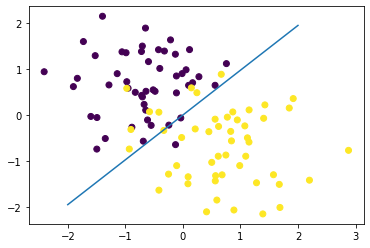

In [5]:
theta,costvector=netwons_method(X,Y,100,0.00001)
x=np.linspace(-2,2,2)
y=-(theta[0,0]+theta[1,0]*x)/theta[2,0]
plt.plot(x,y)
plt.scatter(X[:,1],X[:,2],c=Y)
print(theta)
print("accuracy:",get_accuracy(X,Y,theta))
print(theta[0,0]/theta[2,0],theta[1,0]/theta[2,0])

theta: [[ 0.40125316]
 [ 2.5885477 ]
 [-2.7255885 ]]
accuracy: 0.88
-0.1472170739885948 -0.9497206596108467


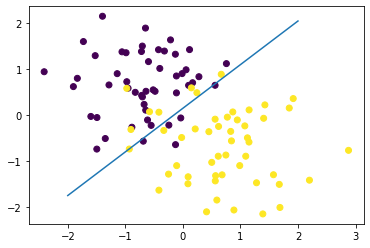

In [5]:

theta,costvector=logistic_regression(X,Y)
print("theta:",theta)
# plot line corresponding to theta
x=np.linspace(-2,2,2)
y=-(theta[0,0]+theta[1,0]*x)/theta[2,0]
plt.plot(x,y)
plt.scatter(X[:,1],X[:,2],c=Y)
print("accuracy:",get_accuracy(X,Y,theta))
print(theta[0,0]/theta[2,0],theta[1,0]/theta[2,0])

[15.214499656360537, 14.00241507463199, 13.184262246134379, 12.587569839609566, 12.111856710863425, 11.709135389438634, 11.358089401282706, 11.04867741931496, 10.775234781148395, 10.533766684015875, 10.320963775505799, 10.133865975251737, 9.969756119196106, 9.826129755569708, 9.700687097088348, 9.591329119795377, 9.496152383414548, 9.41344141111524, 9.34165883724632, 9.279433910166524, 9.225549977885958, 9.178931512314614, 9.138631123559547, 9.103816909075933, 9.073760385553955, 9.047825168787952, 9.025456499516714, 9.006171660642964, 8.98955129173026, 8.975231578251984, 8.962897273688922, 8.952275500329986, 8.943130267844086, 8.935257645945109, 8.928481527614883, 8.922649921471255, 8.917631715270705, 8.913313856691902, 8.90959890207506, 8.906402888419297, 8.903653488480105, 8.90128841313954, 8.899254029268741, 8.89750416502668, 8.895999077924976, 8.894704564038674, 8.893591189468374, 8.892633627580715, 8.89181008769381, 8.891101822757477, 8.890492705229356, 8.889968861792015, 8.889518

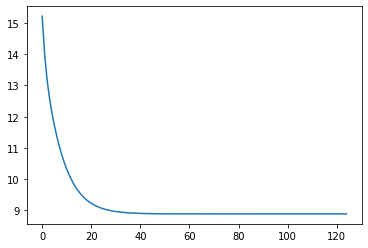

In [6]:
print(costvector)
plt.plot(costvector)

In [7]:
a=np.array([[1],[2],[3]])
a=a.flatten()
print(a*a)
print(np.diag(a*a))

[1 4 9]
[[1 0 0]
 [0 4 0]
 [0 0 9]]
